## Task #2
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/train (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Statistics poperty of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning & EDA

In [ ]:
# checking thenull values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# checking the duplicate values
df.duplicated().sum()

0

In [ ]:
# mean of age
age_mean = df.Age.mean()
age_mean

29.69911764705882

In [ ]:
# mode of embarked columns
embarked_mode = df.Embarked.mode()
embarked_mode[0]

'S'

In [ ]:
# put the age mean in empty values of age column
df["Age"].fillna(age_mean, inplace=True)

In [ ]:
# put the embarked mode in empty values of embarked column
df["Embarked"].fillna(embarked_mode[0], inplace=True)

In [ ]:
# drop  unimportent columns
df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Patterns,trends and Visualization in the data

In [ ]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


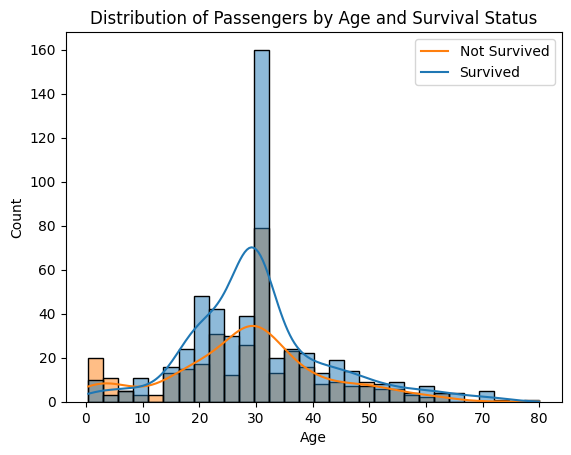

In [ ]:
# find the survival rate by ages with histogram
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribution of Passengers by Age and Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

In [ ]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


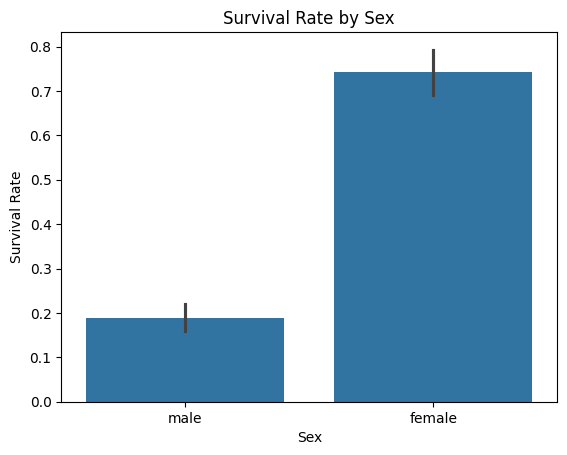

In [ ]:
# find the survival rate by sex with Bar chart
sns.barplot(x='Sex', y='Survived',data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
survival_by_embark = df.groupby('Embarked')['Survived'].mean()
print(survival_by_embark)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


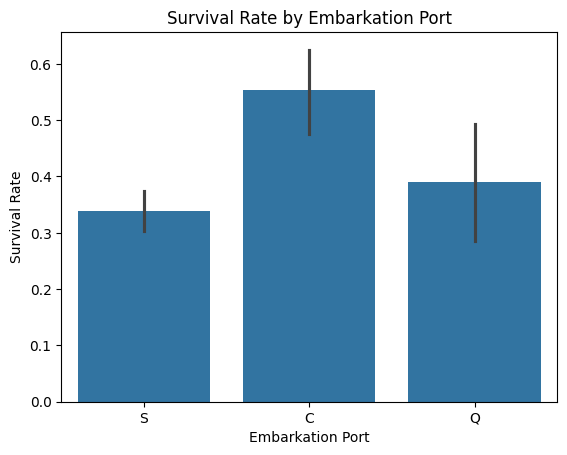

In [ ]:
# find the survival rate by embarked with Bar chart
sns.barplot(x='Embarked', y='Survived',data=df)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

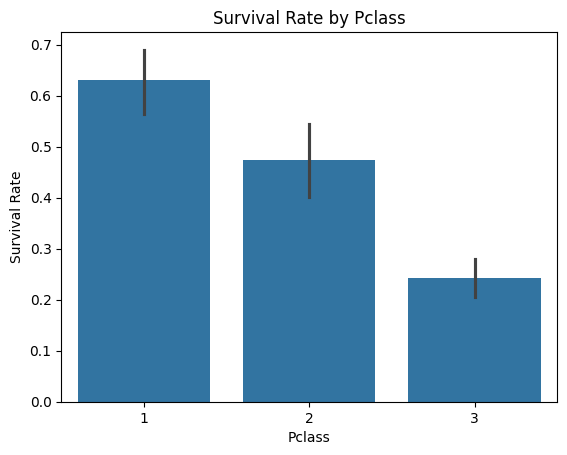

In [ ]:
# find the survival rate by Pclass with bar chart
sns.barplot(x='Pclass', y='Survived',data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

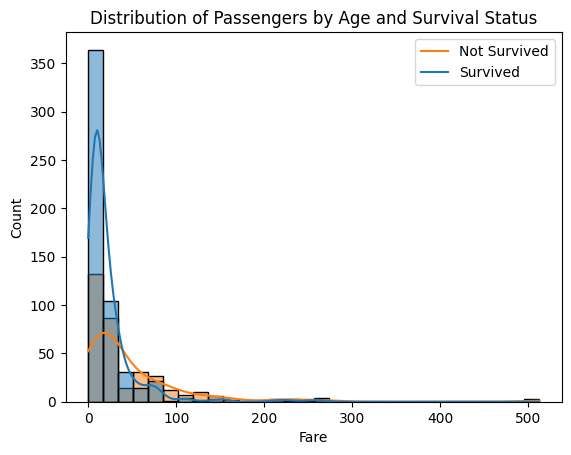

In [ ]:
# find the survival rate by fare with histogram
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('Distribution of Passengers by Age and Survival Status')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()